In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import re

In [2]:
# Configuration
sns.set(style='ticks')
# W = 8.26772 - 2*1.25    # A4 width - margins [in]
W = 5.8
plt.rcParams.update({
    'figure.figsize': (W, W/(4/3)),
    'figure.dpi': 200,
    'font.size' : 11,
    'axes.labelsize': 11,
    'legend.fontsize': 11,
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (
        r'\usepackage{lmodern}'
        r'\usepackage{siunitx}'
        r'\usepackage{physics}'
    )
})
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [3]:
def training_data(f):
    training = []
    validation = []
    best = 0
    with open(f) as f:
        for line in f:
            match = re.search(r'Epoch (\d+) .* Training .* Steps: (\d+) .* Loss: (\d+\.\d+)', line)
            if match:
                training.append([eval(x) for x in match.groups()])
            else:
                match = re.search(r'Epoch (\d+) .* Validation .* Steps: (\d+) .* Loss: (\d+\.\d+)', line)
                if match:
                    validation.append([eval(x) for x in match.groups()])
                else:
                    match = re.search(r'new best validating model', line)
                    if match:
                        best = training[-1][0]
    return (pd.DataFrame(columns=['epoch', 'step', 'loss'], data=training), 
            pd.DataFrame(columns=['epoch', 'step', 'loss'], data=validation), best)

t_plain, v_plain, b_plain = training_data('logs/en_de/training-testing-plain.log')
t_transfer, v_transfer, b_transfer = training_data('logs/en_de/training-simple-transfer.log')
t_1layer, v_1layer, b_1layer = training_data('logs/en_de/training-1l.log')
t_2layer, v_2layer, b_2layer = training_data('logs/en_de/training-2l.log')
t_3layer, v_3layer, b_3layer = training_data('logs/en_de/training-3l.log')
t_4layer, v_4layer, b_4layer = training_data('logs/en_de/training-4l.log')

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


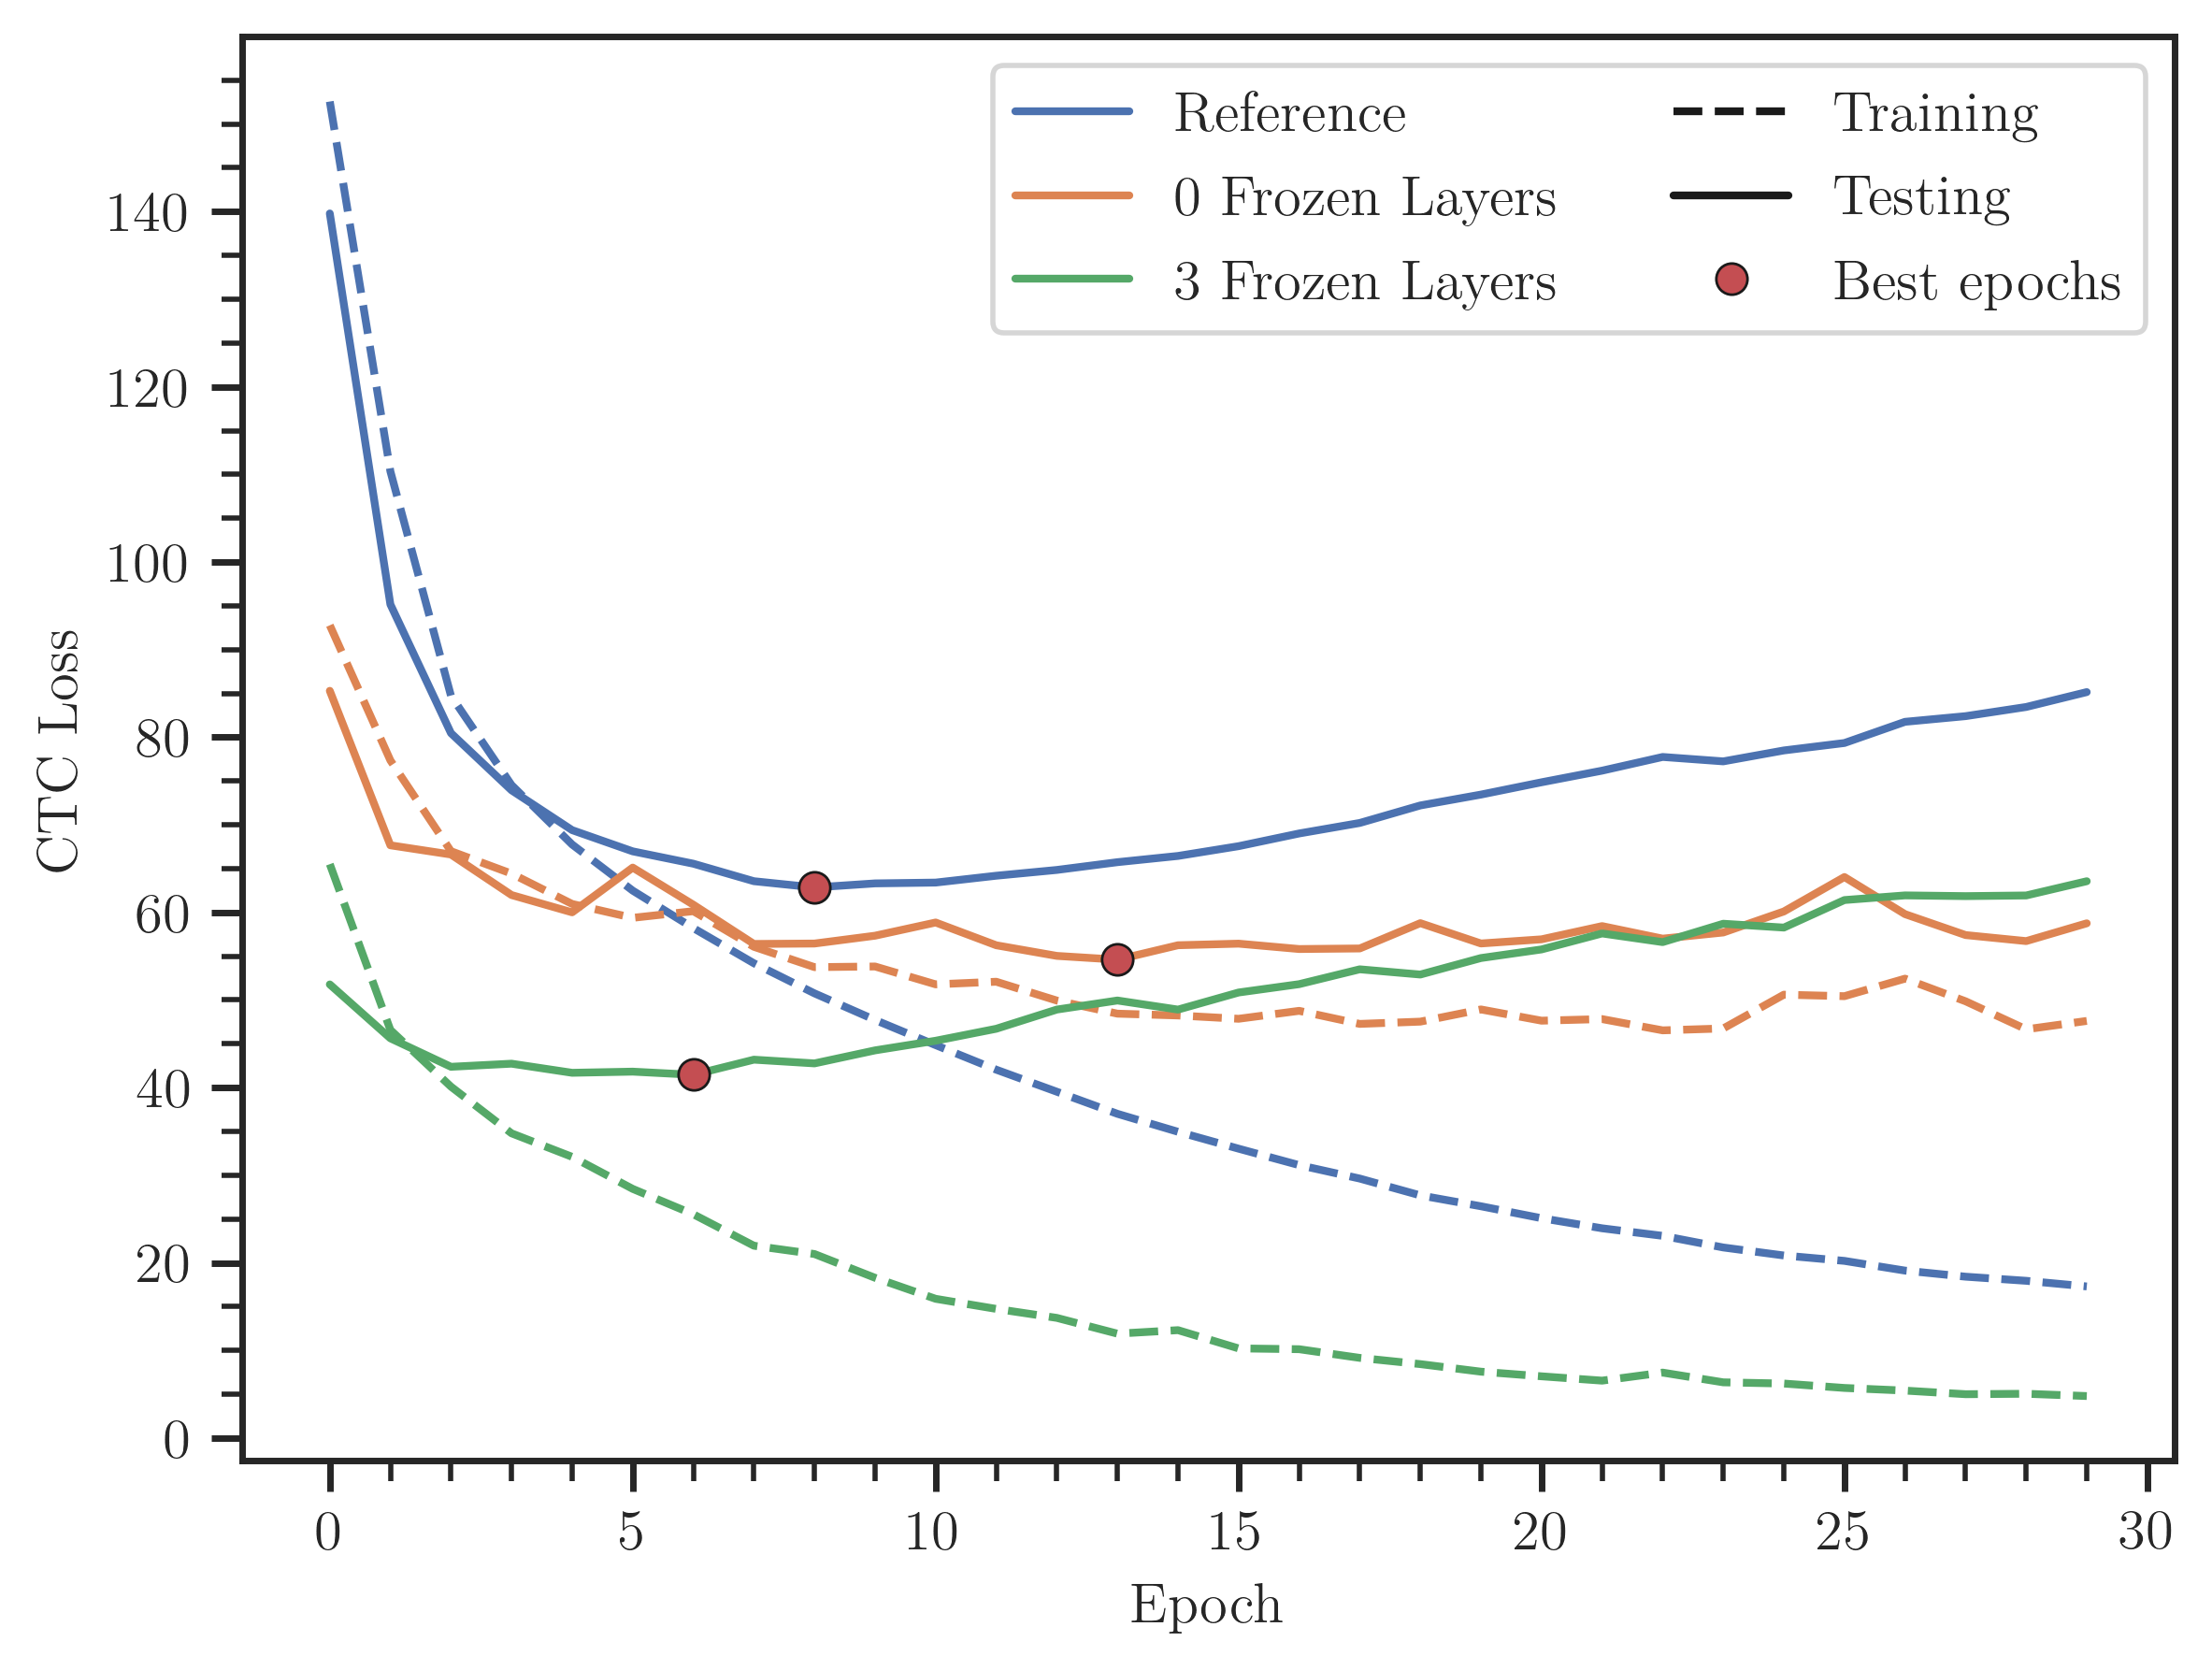

In [4]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.IndexLocator(1, 0))
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_plain.groupby('epoch').loss.last()[:30], 'C0--')
ax.plot(v_plain.groupby('epoch').loss.last()[:30], 'C0-', label='Reference')
ax.plot([b_plain], [v_plain.groupby('epoch').loss.last()[b_plain]], 'ro', mec='k', mew=.5)

ax.plot(t_transfer.groupby('epoch').loss.last()[:30], 'C1--')
ax.plot(v_transfer.groupby('epoch').loss.last()[:30], 'C1-', label='0 Frozen Layers')
ax.plot([b_transfer], [v_transfer.groupby('epoch').loss.last()[b_transfer]], 'ro', mec='k', mew=.5)

ax.plot(t_3layer.groupby('epoch').loss.last()[:30], 'C2--')
ax.plot(v_3layer.groupby('epoch').loss.last()[:30], 'C2-', label='3 Frozen Layers')

ax.plot(15, 50, 'k--', label='Training')
ax.plot(15, 50, 'k-', label='Testing')

ax.plot([b_3layer], [v_3layer.groupby('epoch').loss.last()[b_3layer]], 'ro', mec='k', mew=.5, label='Best epochs')

ax.legend(ncol=2)

fig.savefig('3curves_de.pdf')
plt.show()

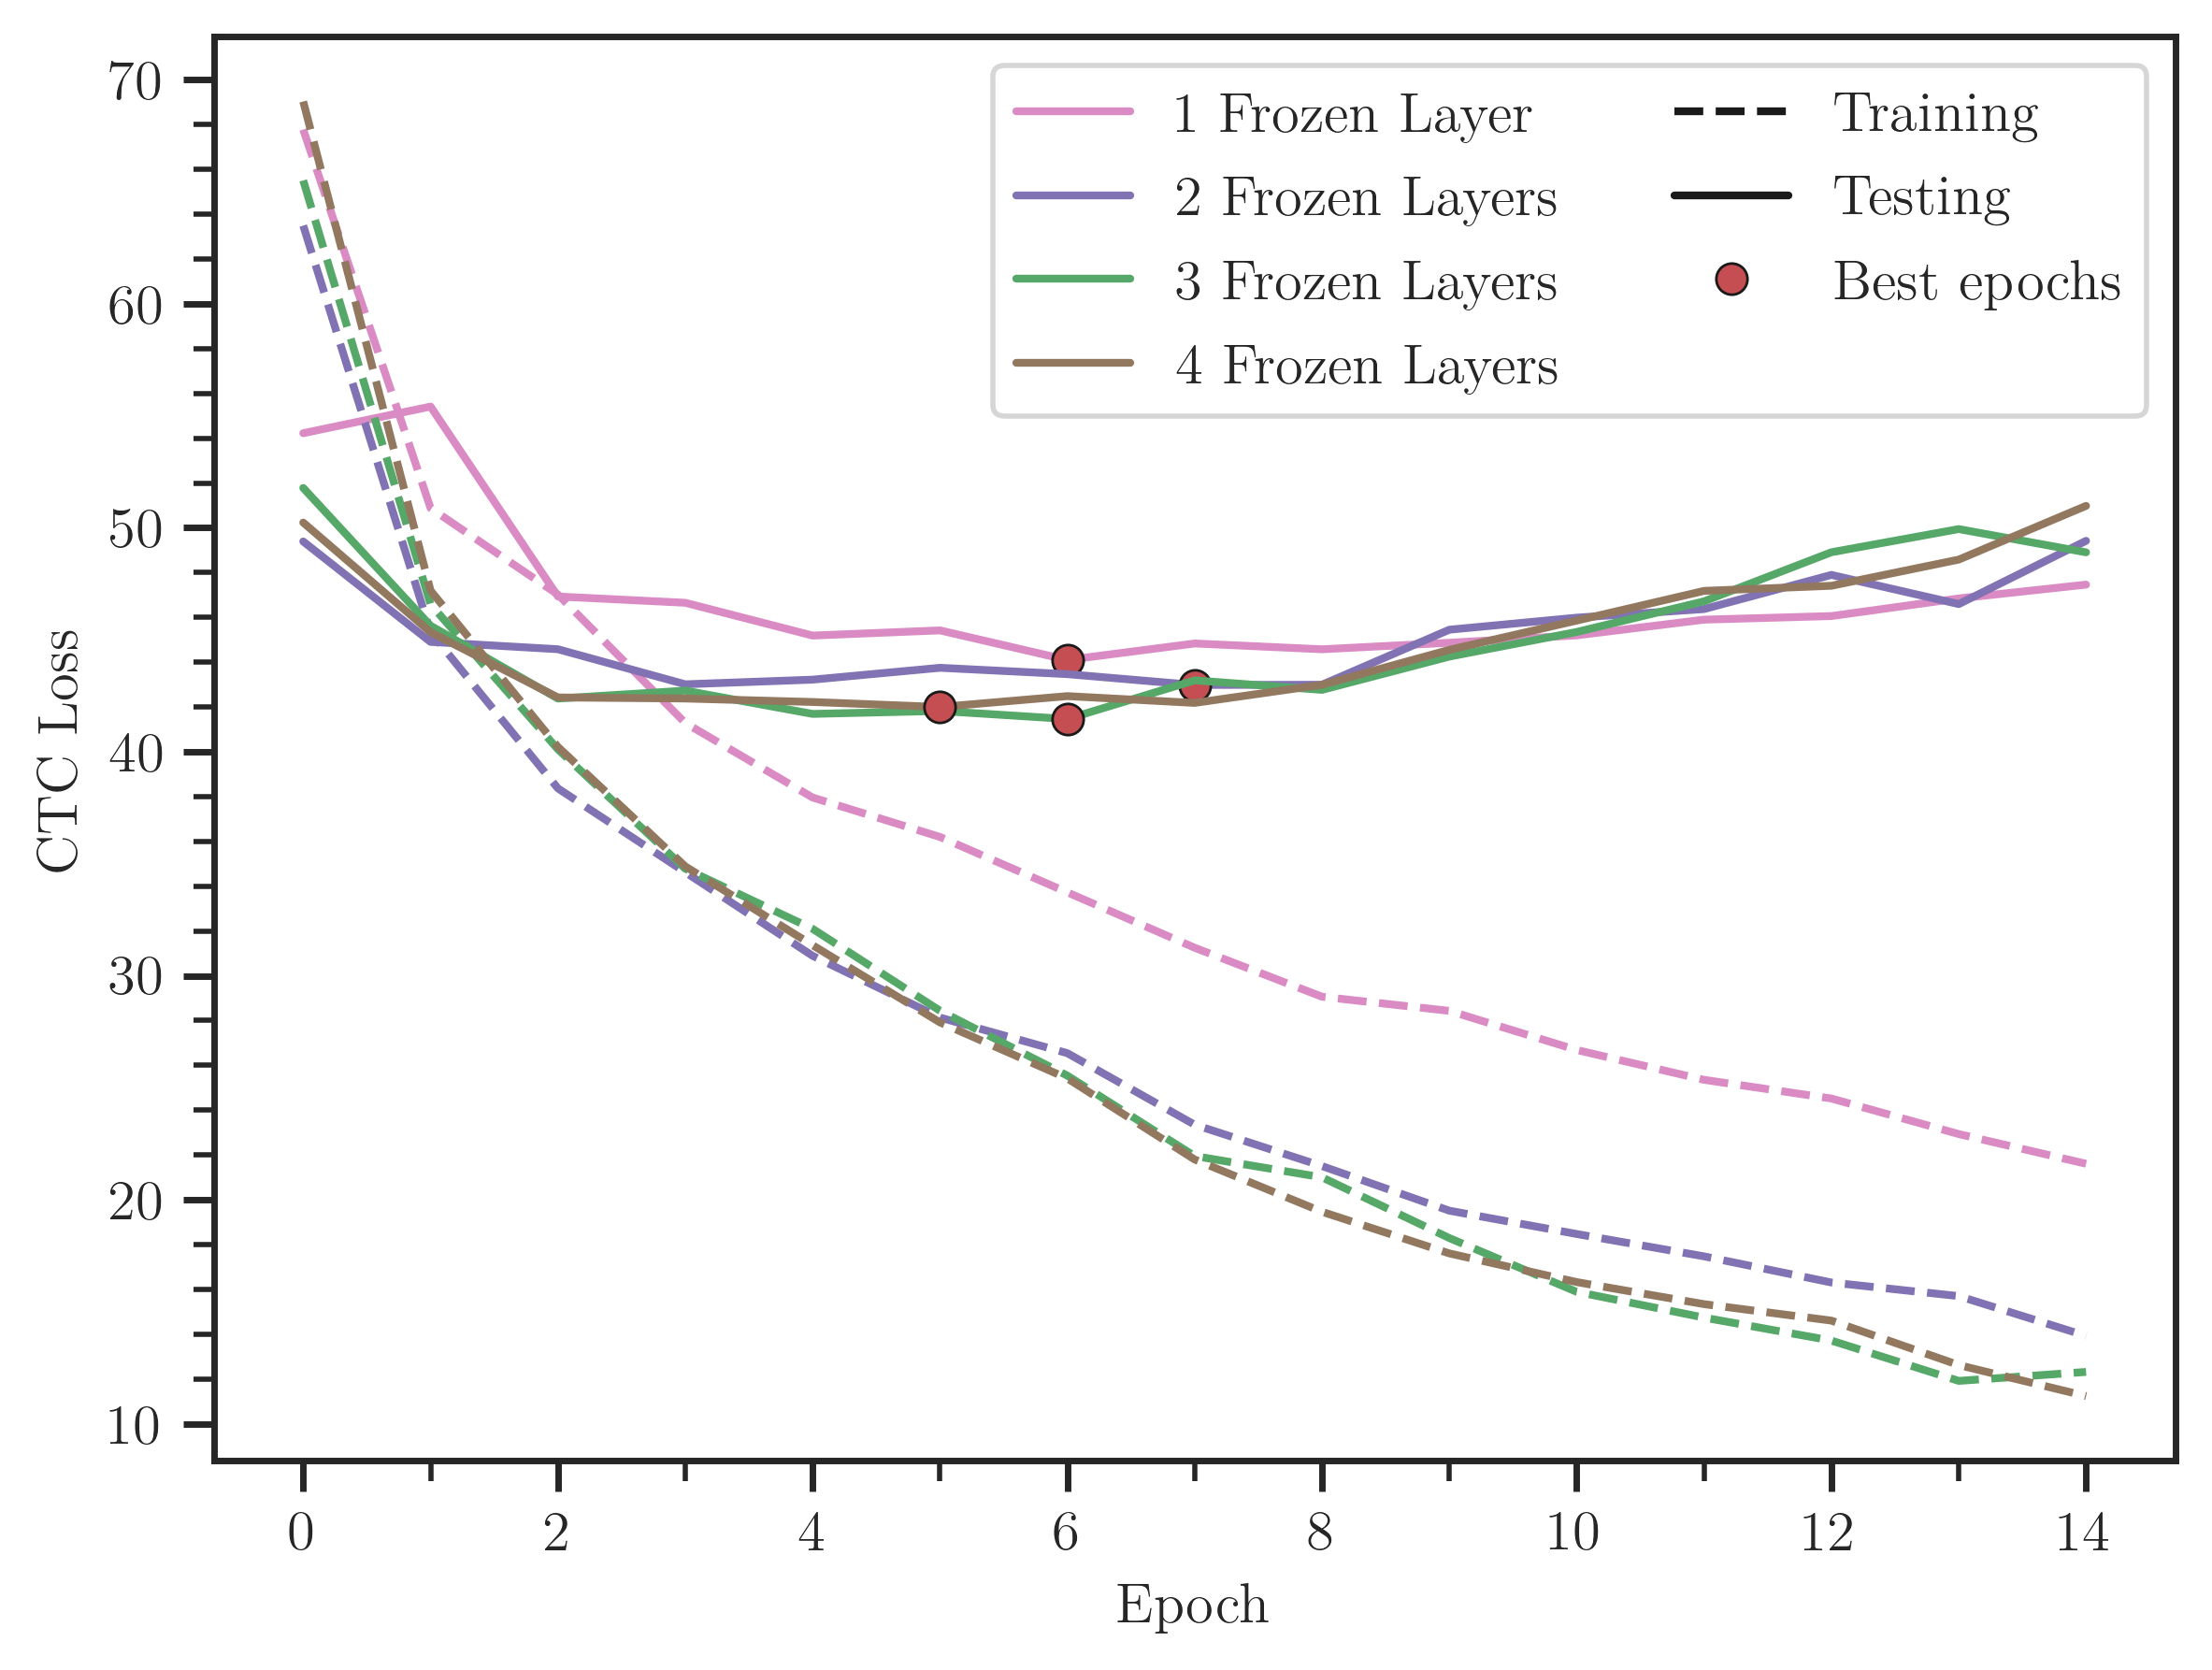

In [5]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.IndexLocator(1, 0))
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_1layer.groupby('epoch').loss.last()[:15], 'C6--')
ax.plot(v_1layer.groupby('epoch').loss.last()[:15], 'C6-', label='1 Frozen Layer')
ax.plot([b_1layer], [v_1layer.groupby('epoch').loss.last()[b_1layer]], 'ro', mec='k', mew=.5)

ax.plot(t_2layer.groupby('epoch').loss.last()[:15], 'C4--')
ax.plot(v_2layer.groupby('epoch').loss.last()[:15], 'C4-', label='2 Frozen Layers')
ax.plot([b_2layer], [v_2layer.groupby('epoch').loss.last()[b_2layer]], 'ro', mec='k', mew=.5)

ax.plot(t_3layer.groupby('epoch').loss.last()[:15], 'C2--')
ax.plot(v_3layer.groupby('epoch').loss.last()[:15], 'C2-', label='3 Frozen Layers')
ax.plot([b_3layer], [v_3layer.groupby('epoch').loss.last()[b_3layer]], 'ro', mec='k', mew=.5)

ax.plot(t_4layer.groupby('epoch').loss.last()[:15], 'C5--')
ax.plot(v_4layer.groupby('epoch').loss.last()[:15], 'C5-', label='4 Frozen Layers')

ax.plot(6, 50, 'k--', label='Training')
ax.plot(6, 50, 'k-', label='Testing')
ax.plot([b_4layer], [v_4layer.groupby('epoch').loss.last()[b_4layer]], 'ro', mec='k', mew=.5, label='Best epochs')

ax.legend(ncol=2)

fig.savefig('4curves_de.pdf')
plt.show()

In [73]:
# Results:
# - Complete Training: 
#   - WER: 0.697230, CER: 0.421320, loss: 68.087730
#   - 75 Epochs in 4:22:19.933501
# - Simple Transfer (No frozen layers):
#   - WER: 0.627491, CER: 0.372386, loss: 59.587582
#   - 30 Epochs in 1:02:04.997203
# - Finetuning (First 1 layers frozen):
#   - WER: 0.482614, CER: 0.256564, loss: 49.028580
#   - 30 Epochs in 1:04:50.387397
# - Finetuning (First 2 layers frozen):
#   - WER: 0.442792, CER: 0.224391, loss: 48.067539
#   - 30 Epochs in 1:01:01.434653
# - Finetuning (First 3 layers frozen):
#   - WER: 0.437464, CER: 0.224091, loss: 46.551868
#   - 30 Epochs in 1:02:09.698368
# - Finetuning (First 3 layers and 5th layer frozen):
#   - WER: 0.462034, CER: 0.249311, loss: 46.648895
#   - 30 Epochs in 1:00:52.470192

## Swiss German

In [6]:
t_p, v_p, b_p = training_data('logs/en_ch/training-complete.log')
t_t, v_t, b_t = training_data('logs/en_ch/training-st.log')
t_1l, v_1l, b_1l = training_data('logs/en_ch/training-1l.log')
t_2l, v_2l, b_2l = training_data('logs/en_ch/training-2l.log')
t_3l, v_3l, b_3l = training_data('logs/en_ch/training-3l.log')
t_4l, v_4l, b_4l = training_data('logs/en_ch/training-4l.log')

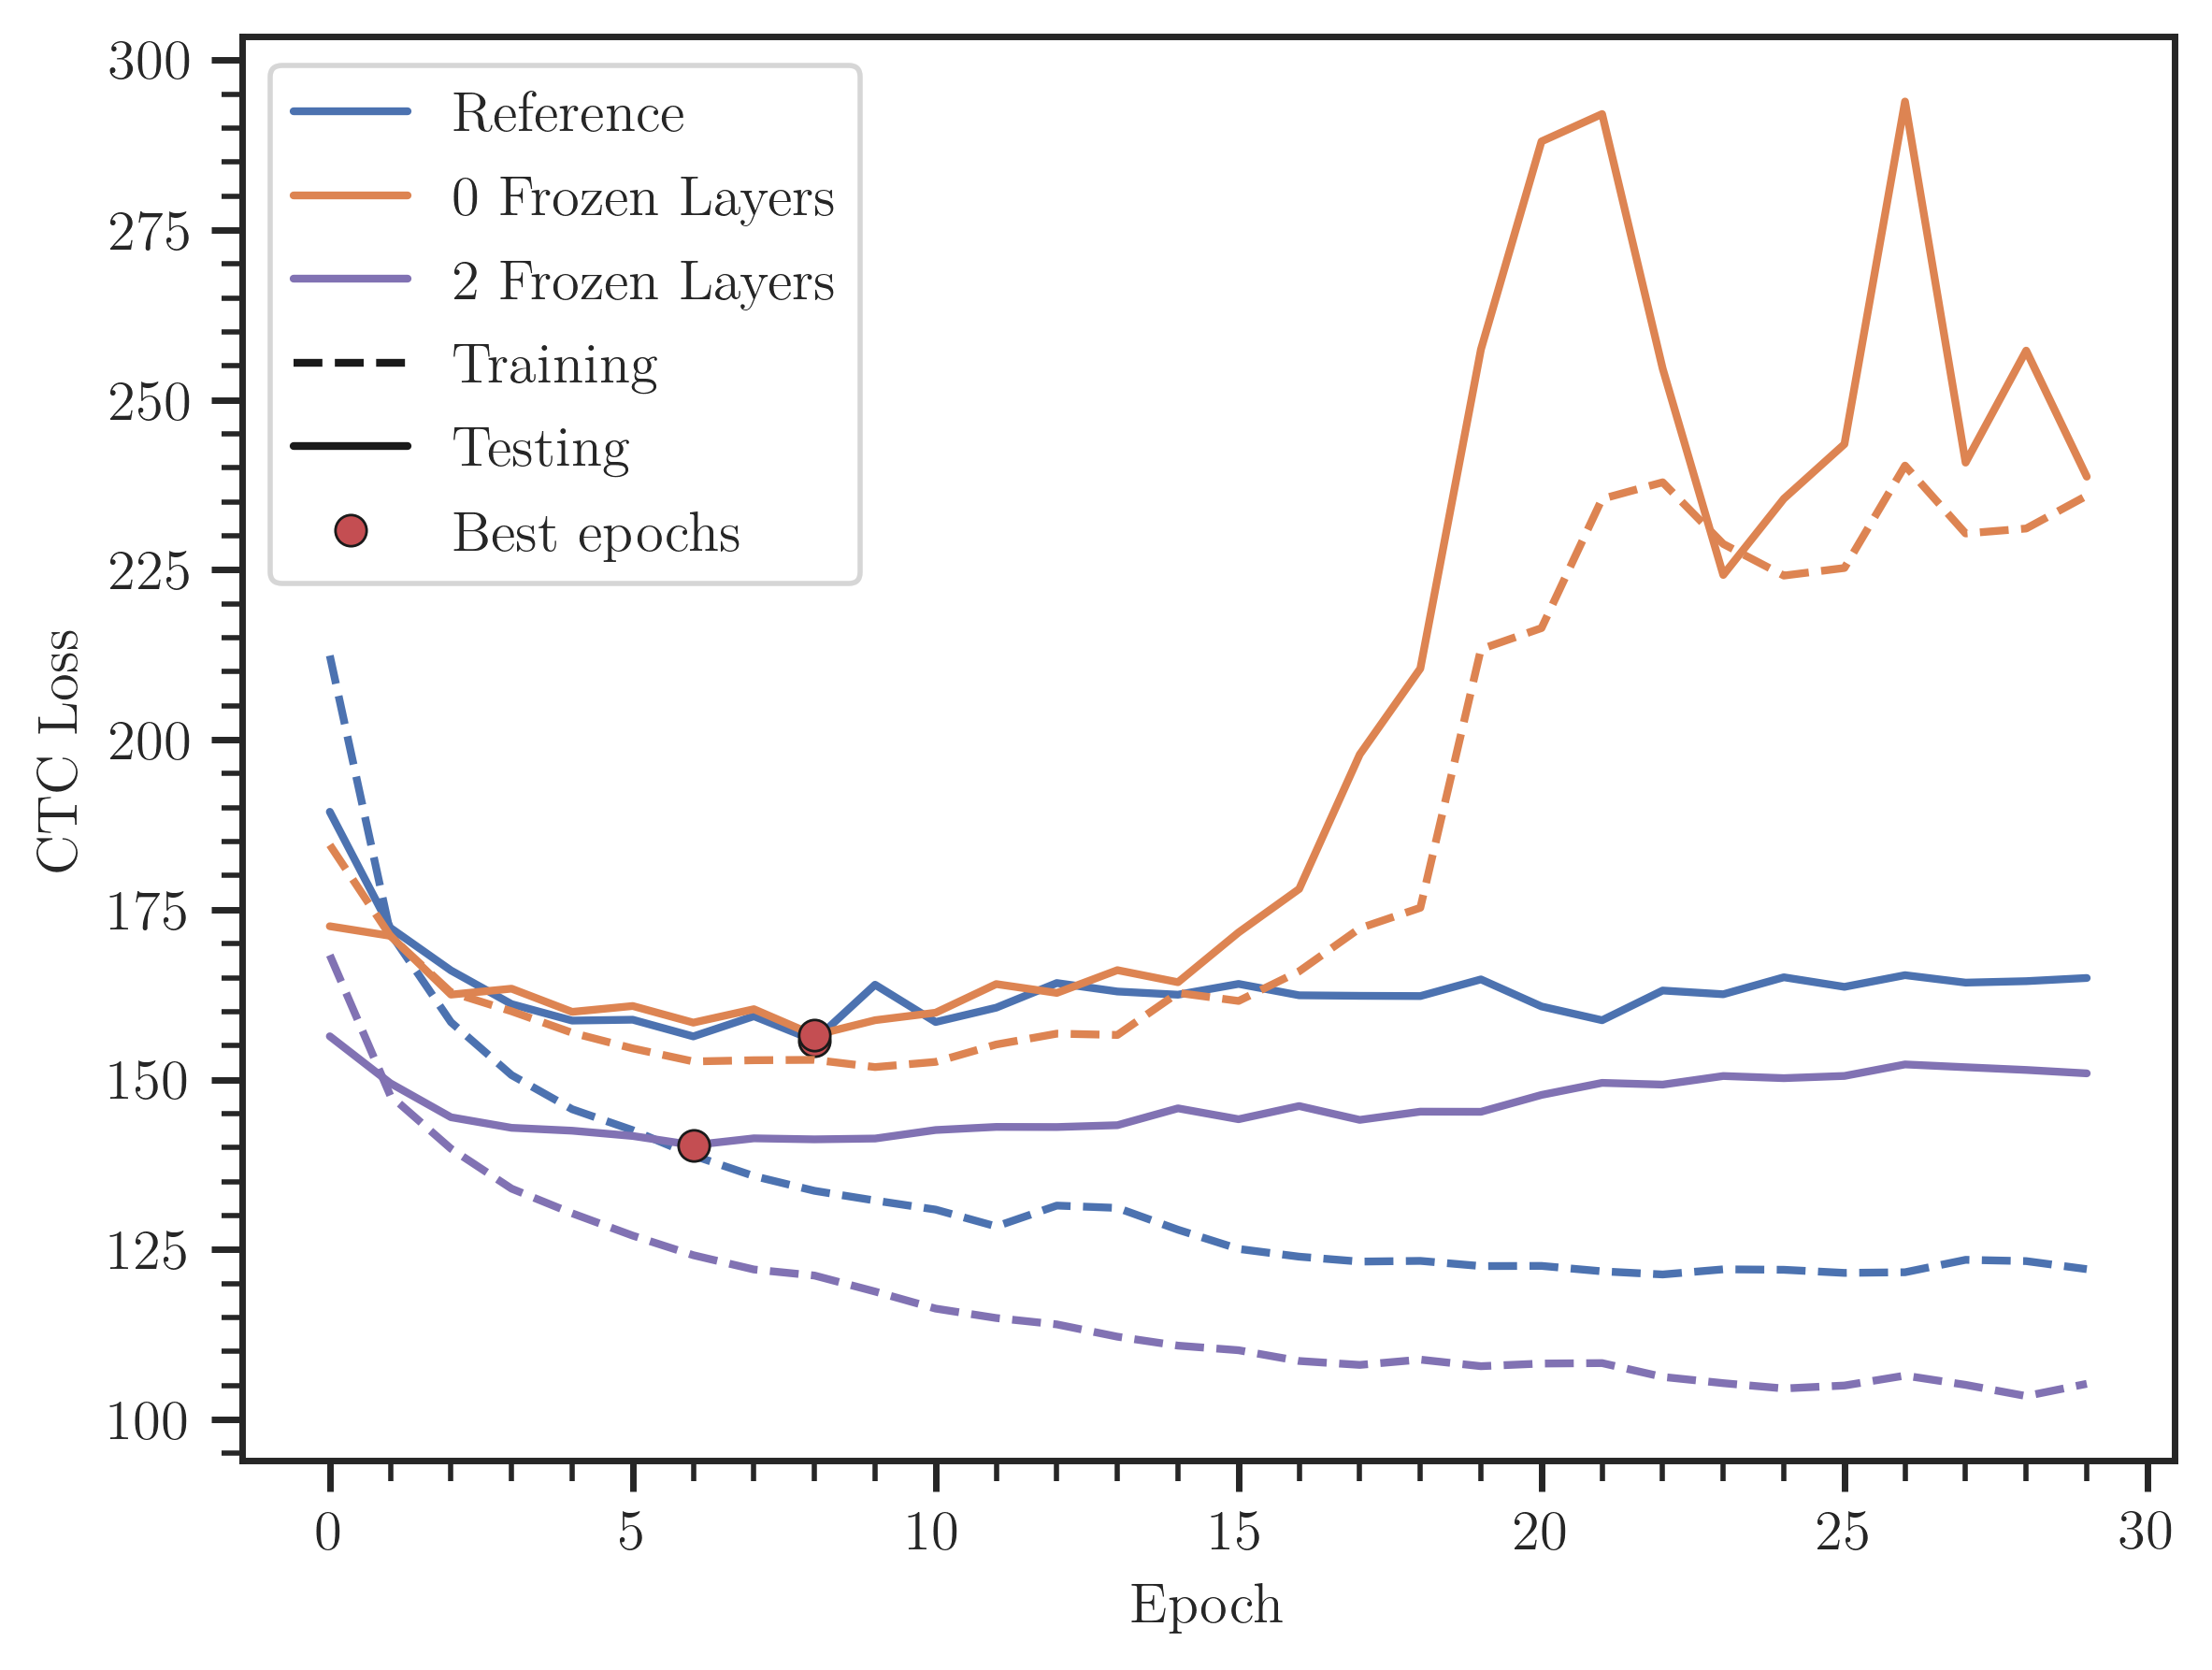

In [7]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.IndexLocator(1, 0))
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_p.groupby('epoch').loss.last()[:30], 'C0--')
ax.plot(v_p.groupby('epoch').loss.last()[:30], 'C0-', label='Reference')
ax.plot([b_p], [v_p.groupby('epoch').loss.last()[b_p]], 'ro', mec='k', mew=.5)

ax.plot(t_t.groupby('epoch').loss.last()[:30], 'C1--')
ax.plot(v_t.groupby('epoch').loss.last()[:30], 'C1-', label='0 Frozen Layers')
ax.plot([b_t], [v_t.groupby('epoch').loss.last()[b_t]], 'ro', mec='k', mew=.5)

ax.plot(t_2l.groupby('epoch').loss.last()[:30], 'C4--')
ax.plot(v_2l.groupby('epoch').loss.last()[:30], 'C4-', label='2 Frozen Layers')

ax.plot(15, 150, 'k--', label='Training')
ax.plot(15, 150, 'k-', label='Testing')
ax.plot([b_2l], [v_2l.groupby('epoch').loss.last()[b_2l]], 'ro', mec='k', mew=.5, label='Best epochs')

ax.legend()

fig.savefig('3curves_ch.pdf')
plt.show()

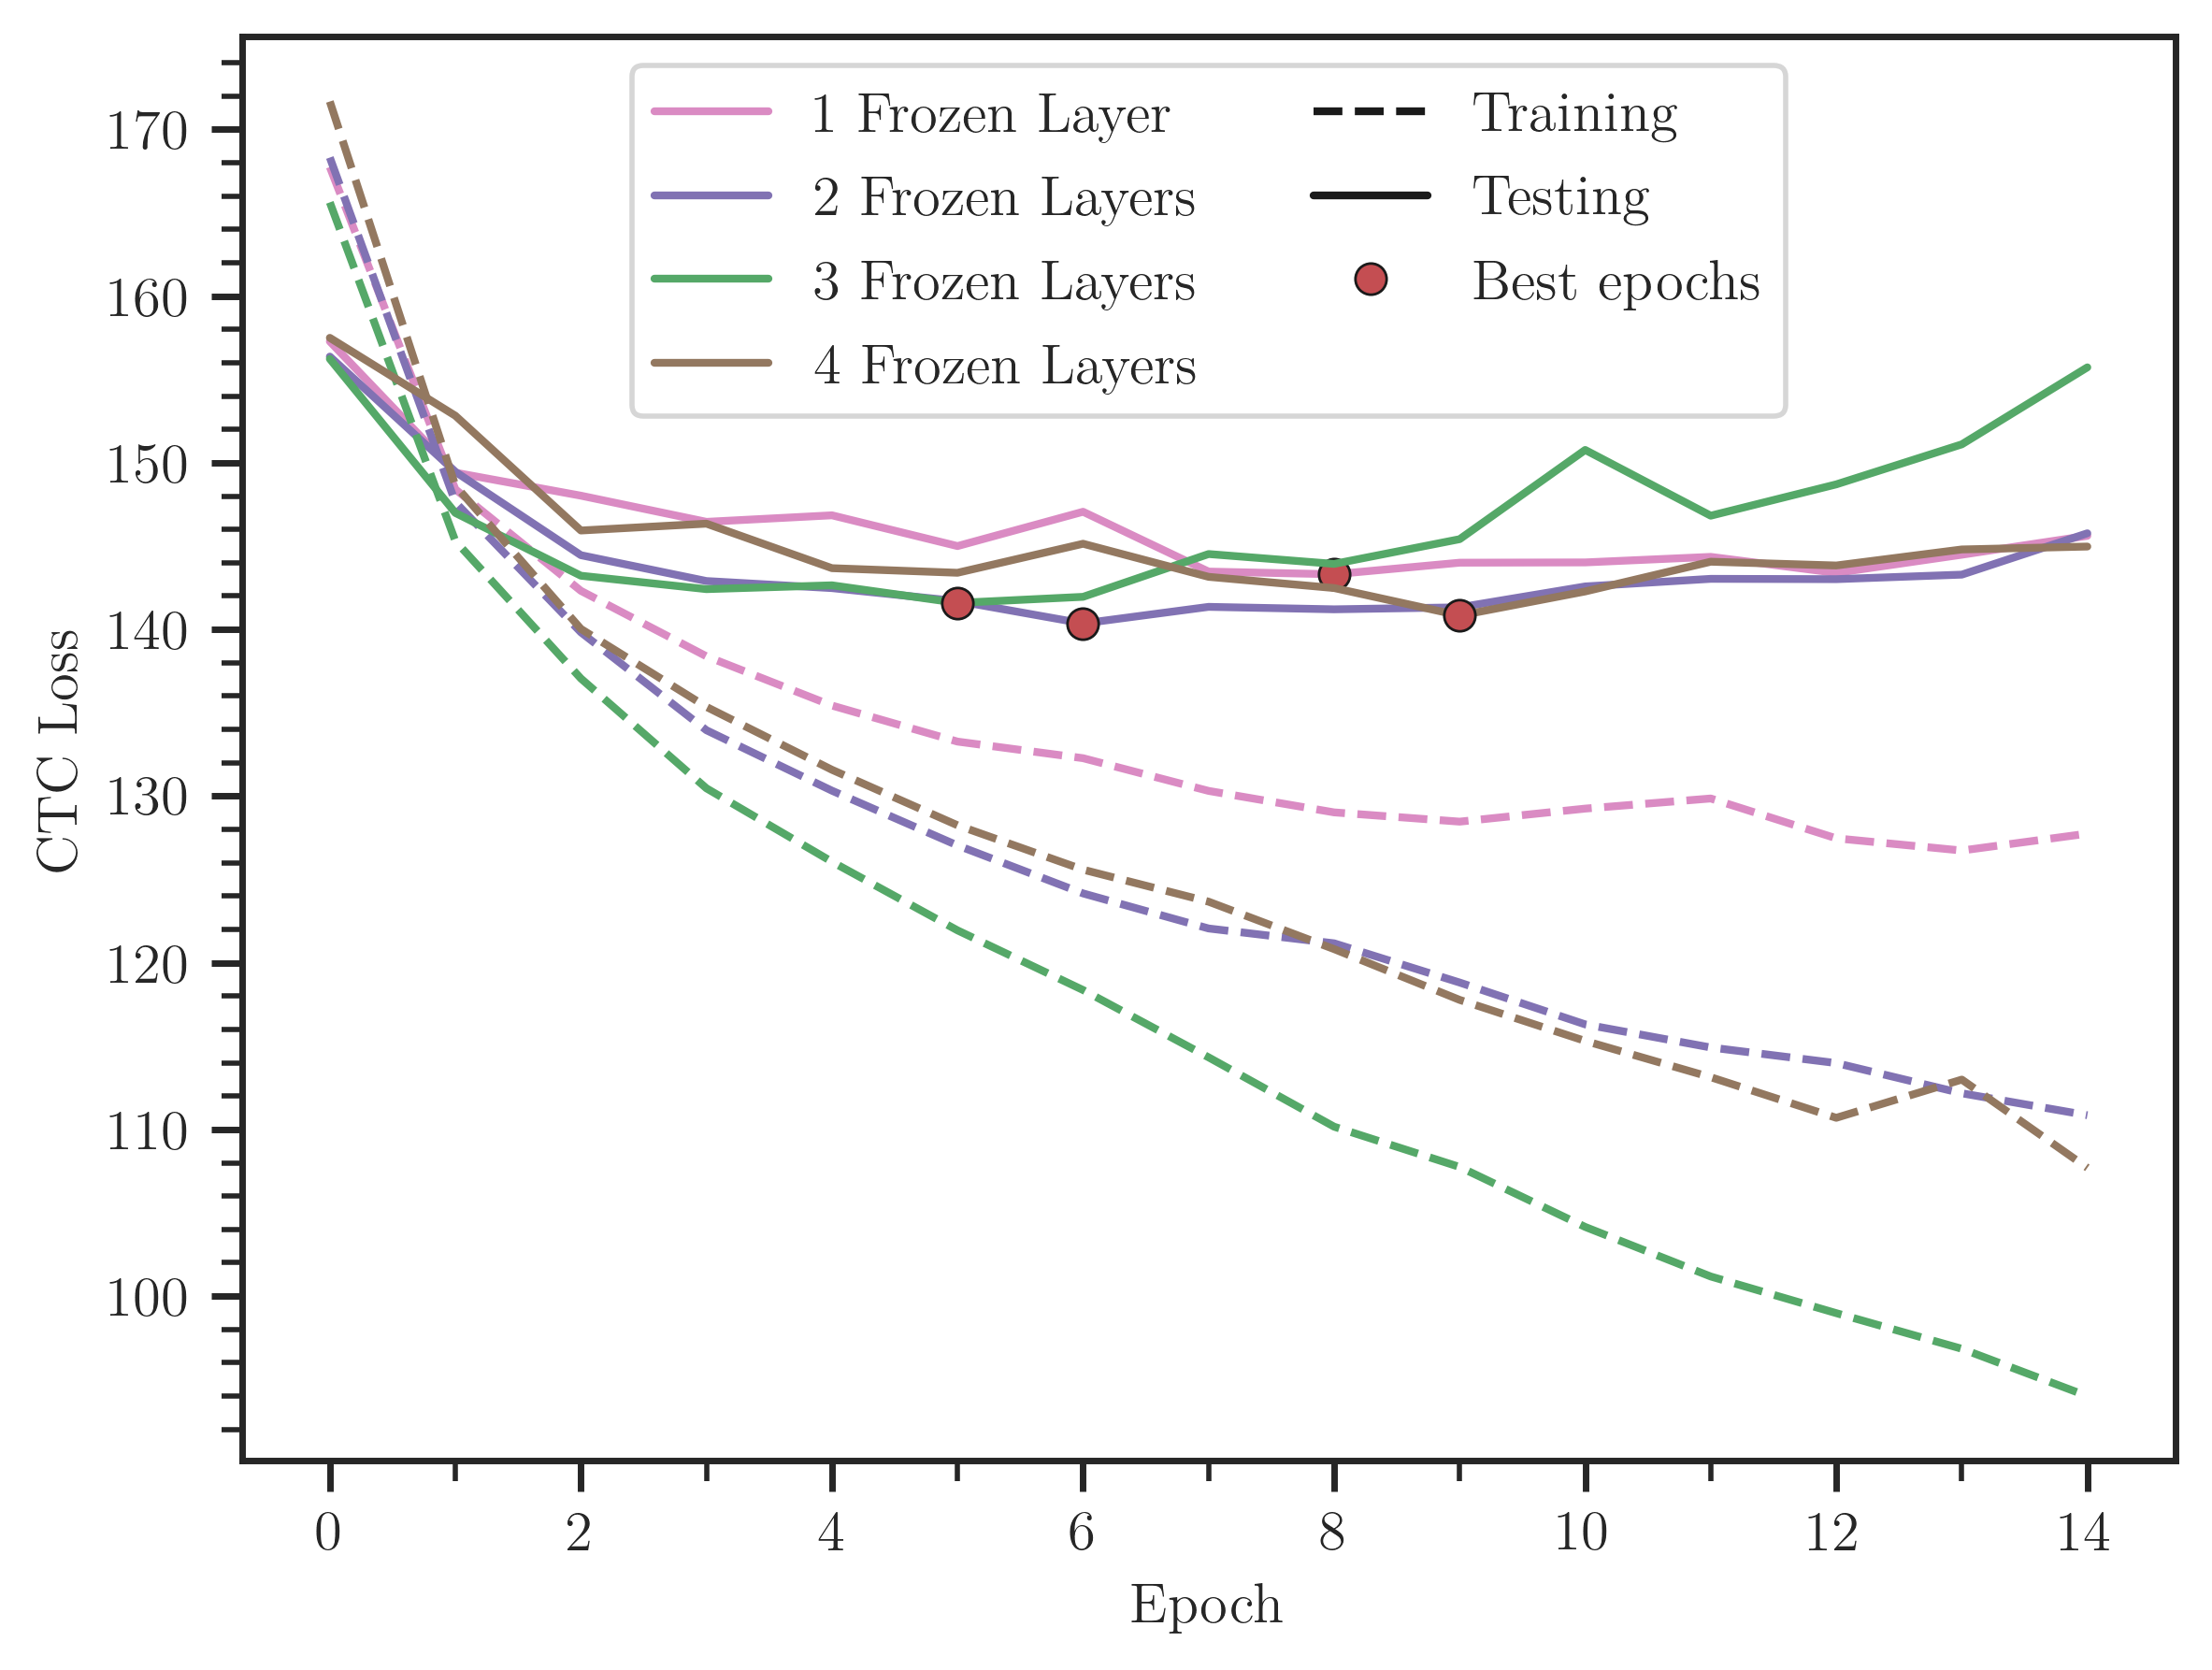

In [8]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.IndexLocator(1, 0))
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_1l.groupby('epoch').loss.last()[:15], 'C6--')
ax.plot(v_1l.groupby('epoch').loss.last()[:15], 'C6-', label='1 Frozen Layer')
ax.plot([b_1l], [v_1l.groupby('epoch').loss.last()[b_1l]], 'ro', mec='k', mew=.5)

ax.plot(t_2l.groupby('epoch').loss.last()[:15], 'C4--')
ax.plot(v_2l.groupby('epoch').loss.last()[:15], 'C4-', label='2 Frozen Layers')
ax.plot([b_2l], [v_2l.groupby('epoch').loss.last()[b_2l]], 'ro', mec='k', mew=.5)

ax.plot(t_3l.groupby('epoch').loss.last()[:15], 'C2--')
ax.plot(v_3l.groupby('epoch').loss.last()[:15], 'C2-', label='3 Frozen Layers')
ax.plot([b_3l], [v_3l.groupby('epoch').loss.last()[b_3l]], 'ro', mec='k', mew=.5)

ax.plot(t_4l.groupby('epoch').loss.last()[:15], 'C5--')
ax.plot(v_4l.groupby('epoch').loss.last()[:15], 'C5-', label='4 Frozen Layers')

ax.plot(6, 150, 'k--', label='Training')
ax.plot(6, 150, 'k-', label='Testing')
ax.plot([b_4l], [v_4l.groupby('epoch').loss.last()[b_4l]], 'ro', mec='k', mew=.5, label='Best epochs')

ax.legend(ncol=2)

fig.savefig('4curves_ch.pdf')
plt.show()

In [77]:
# Results:
# - Complete Training: 
#   - WER: 0.741050, CER: 0.517893, loss: 152.834473
#   - 30 Epochs in 4:12:38.333282
# - Simple Transfer (No frozen layers):
#   - WER: 0.761518, CER: 0.538045, loss: 152.931824
#   - 30 Epochs in 3:57:37.480445
# - 1 frozen layer:
#   - WER: 0.692976, CER: 0.475369, loss: 141.553253
#   - 30 Epochs in 4:57:43.053273
# - 2 frozen layers:
#   - WER: 0.671790, CER: 0.454388, loss: 138.530258
#   - 30 Epochs in 4:47:15.597202
# - 3 frozen layers:
#   - WER: 0.683573, CER: 0.472966, loss: 138.465439
#   - 30 Epochs in 4:44:27.099735
# - 4 frozen layers:
#   - WER: 0.682591, CER: 0.464615, loss: 138.306335
#   - 30 Epochs in 4:46:01.481480